# VGGNet as a Black-Box Feature Extractor

In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

vgg16 = VGG16(weights='imagenet')
vgg16.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Cannibalize VGGNet

In [2]:
fc2 = vgg16.get_layer('fc2').output
model = Model(input=vgg16.input, output=fc2)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/Users/edward.banner/.anaconda/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  from ipykernel import kernelapp as app


# Load Images

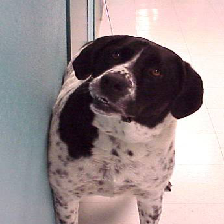

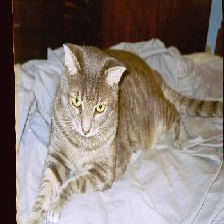

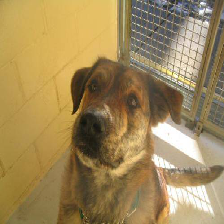

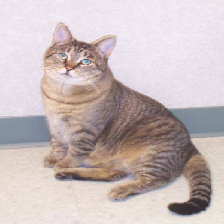

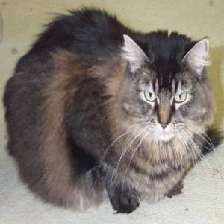

In [4]:
from IPython.display import display
import pickle

imgs, y = pickle.load(open('data/CatsVDogs.p', 'rb'))

for img in imgs[:5]:
    display(img)

# Preprocessing Images

In [5]:
import numpy as np
from IPython.display import display
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
    
X_tf = np.array([img_to_array(img) for img in imgs])
X_tf = preprocess_input(X_tf)

X_tf.shape

(2000, 224, 224, 3)

# Extract Image Features with VGGNet

In [6]:
A = model.predict(X_tf[:8])

A.shape

(8, 4096)

# Train Logistic Regression Classifier on Features

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_shape=A[0].shape))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4097      
Total params: 4,097.0
Trainable params: 4,097
Non-trainable params: 0.0
_________________________________________________________________


# Fit the Model on VGGNet Activations

In [8]:
model.fit(A, y[:8])

Epoch 1/10
8/8 [==============================] - 0s - loss: 0.7432 - acc: 0.6250
Epoch 2/10
8/8 [==============================] - 0s - loss: 0.3050 - acc: 0.7500
Epoch 3/10
8/8 [==============================] - 0s - loss: 0.1090 - acc: 1.0000
Epoch 4/10
8/8 [==============================] - 0s - loss: 0.0379 - acc: 1.0000
Epoch 5/10
8/8 [==============================] - 0s - loss: 0.0144 - acc: 1.0000
Epoch 6/10
8/8 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 7/10
8/8 [==============================] - 0s - loss: 0.0030 - acc: 1.0000
Epoch 8/10
8/8 [==============================] - 0s - loss: 0.0016 - acc: 1.0000
Epoch 9/10
8/8 [==============================] - 0s - loss: 9.4567e-04 - acc: 1.0000
Epoch 10/10
8/8 [==============================] - 0s - loss: 5.8707e-04 - acc: 1.0000
